In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
# 한글 폰트 적용
from matplotlib import rc
import matplotlib.font_manager as fm

# 시스템에 설치된 폰트 확인
fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 폰트 설정, 확인
plt.rc('font', family='NanumGothic')
plt.rcParams['font.family']

font_location = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [2]:
welfare_raw = pd.read_csv('welfare.csv')
welfare = welfare_raw.copy()
welfare

,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종번호,지역,나이
0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0
1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0
2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0
3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0
4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0
...,...,...,...,...,...,...,...,...,...
16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0
16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0
16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0
16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0


In [3]:
welfare = welfare.drop(['Unnamed: 0'], axis=1)

In [4]:
# < 3. 연령대별 월급의 차이 >
# 1) 변수 검토 및 전처리(연령대, 월급)
# 1-1) 연령대 변수 확인 -> 나이 변수로부터 파생 변수를 생성
# 연령대의 구분: 3단계로 구분
# 청년: 30세 미만, 중년: 60세 미만, 노년: 60세 이상
# 청년(young), 중년(middle), 노년(old)

In [5]:
# 연령대 파생변수 생성 (나이 변수를 사용)
welfare = welfare.assign(연령별 = np.where(welfare['나이']<30, '청년',
                        np.where(welfare['나이']<60, '중년', '노년')))
welfare

,성별,출생년도,혼인상테,종교,월급,직종번호,지역,나이,연령별
0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년
1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년
2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년
3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년
4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년
...,...,...,...,...,...,...,...,...,...
16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년
16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년
16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년
16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년


In [6]:
# 연령대의 빈도수 확인
# 노년: 7737, 중년: 5329, 청년: 3525
welfare['연령별'].value_counts()

연령별
노년    7737
중년    5329
청년    3525
Name: count, dtype: int64

In [7]:
# 1-2) 월급 변수 확인
welfare['월급'].dtype # dtypes('float64')

dtype('float64')

In [8]:
# 결측치 아닌값의 개수: 5633
# 월급의 범위: 0 ~ 2017, 평균: 275(만원), 중앙값: 236(만원)
welfare['월급'].describe()

count    5633.000000
mean      275.647080
std       214.807673
min         0.000000
25%       125.000000
50%       236.000000
75%       363.000000
max      2017.000000
Name: 월급, dtype: float64

In [9]:
# 2) 분석표(통계요약표)
ageg_income = welfare.dropna(subset=['월급']) \
                    .groupby('연령별', as_index=False) \
                    .agg(평균월급=('월급', 'mean'))
ageg_income

,연령별,평균월급
0,노년,140.707840
1,중년,358.490003
2,청년,226.262726


<Axes: xlabel='연령별', ylabel='평균월급'>

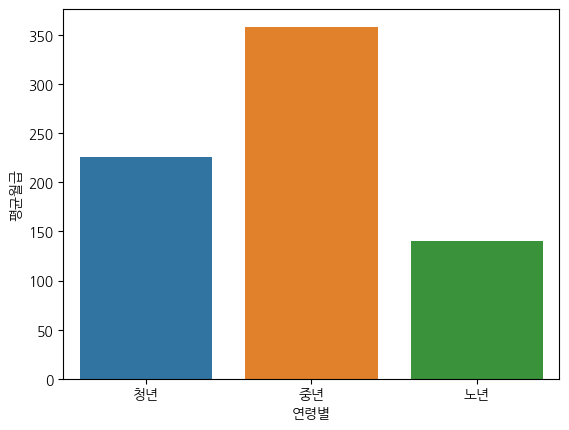

In [10]:
# 3) 시각화 - barplot
sns.barplot(data=ageg_income, x='연령별', y='평균월급', order=['청년', '중년', '노년'])

In [11]:
# 4) 분석 결과
# 청년일 떄는 226만원, 중년일 때는 358만원, 노년일 때는 140만원의 평균 월급을 받고 있는 것을 알 수 있다.

In [12]:
welfare.to_csv('welfare.csv')

In [13]:
welfare = pd.read_csv('welfare.csv')
welfare

,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종번호,지역,나이,연령별
0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년
1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년
2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년
3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년
4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년
...,...,...,...,...,...,...,...,...,...,...
16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년
16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년
16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년
16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년
